**Data Science - course work**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
from scipy.stats import mannwhitneyu

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import r2_score # r2 -> goodness of fit in linear regression

from sklearn.svm import SVR #support vector regression



Task 1.2 - Exploratory Data analysis

In [3]:
df_features = pd.read_csv('/Users/chiaraspear/anaconda_projects/datenanalyse-gruppenprojekt/MIT_fingertapping_dataset/MIT_USERS_FEATURES.csv')
#change path to where the file is stored

df_features.head(10)

,ID,Parkinsons,UPDRS,median_flight_time,std_flight_time,median_hold_time,std_hold_time,std_binned_flight_time,std_binned_hold_time,hand_symmetry,mean_flight_symmetry,mean_hold_symmetry,std_flight_symmetry,std_hold_symmetry,mean_flight_direction_symmetry,std_flight_direction_symmetry,mean_hold_direction_symmetry,std_hold_direction_symmetry
0,11,True,14.25,142.90,184.584488,93.9,44.440760,4.693407,1.739548,848.0,52.885633,61.061132,96.076974,29.838731,19.291014,69.417942,57.643646,27.413833
1,60,False,2.00,529.00,837.476992,122.9,37.994156,66.097678,4.373105,239.0,43.619230,36.612143,39.990040,3.831410,94.939998,60.961730,34.278162,4.200481
2,67,True,25.25,476.50,1154.993782,179.2,77.017094,81.909059,13.111766,248.0,175.433172,79.949188,116.865281,55.498010,153.803039,153.083905,80.864519,56.822530
3,68,False,6.00,361.60,823.429272,151.0,25.416287,39.183555,2.243013,301.0,8.972104,24.656048,133.634322,3.897480,47.494213,127.453713,24.601185,4.848499
4,70,True,26.25,617.70,1434.028934,179.7,42.075270,147.909365,7.374355,140.0,526.441293,26.459183,487.008181,7.729029,469.763131,442.845315,23.158001,4.802304
5,71,True,13.75,240.85,446.101598,150.7,41.320102,33.144839,2.981236,157.0,200.446286,19.672806,128.574912,2.775047,247.182804,240.357460,20.755592,0.079212
6,72,True,17.00,339.00,421.319926,157.5,69.600713,40.569706,9.020156,216.0,377.519083,92.029441,57.976288,45.225193,394.465070,128.643829,92.069659,43.371874
7,73,True,23.25,177.40,686.931101,80.8,40.743350,25.053689,1.862759,362.0,36.332749,34.821344,87.430606,24.336365,31.563012,311.104010,35.250517,22.643673
8,74,True,11.25,99.95,304.664564,119.1,46.188680,24.175599,5.037391,377.0,78.806065,4.291008,131.540485,25.330907,73.712051,176.016721,2.413284,25.551014
9,75,True,12.75,102.70,207.360561,165.8,36.579516,12.727321,10.162363,287.0,65.191827,0.956981,60.735012,3.649412,74.718568,96.282482,1.791559,3.637757


1.2.1 Boxplot to visualise difference in UPDRS scores for the Healthy and Parkinson’s patients

In [4]:
healthy_UPDRS = df_features.loc[df_features['Parkinsons'] == False, 'UPDRS']
parkinsons_UPDRS = df_features.loc[df_features['Parkinsons'] == True, 'UPDRS']

print(f"Parkinson's mean UPDRS: {parkinsons_UPDRS.mean()}")
print(f"Healthy mean UPDRS: {healthy_UPDRS.mean()}")

Parkinson's mean UPDRS: 20.613095238095237
Healthy mean UPDRS: 1.9244186046511629


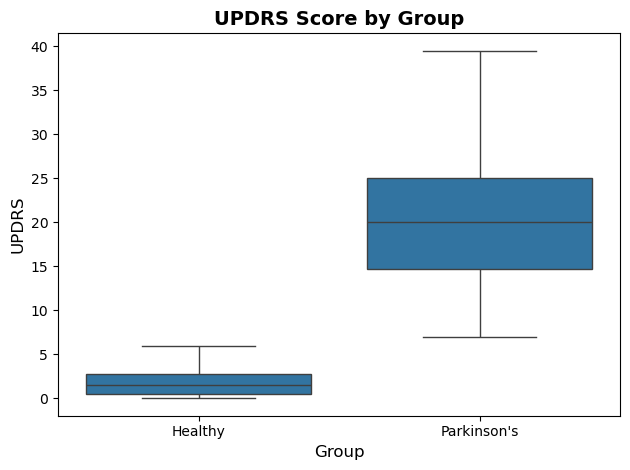

In [5]:
sns.boxplot(data=df_features, x='Parkinsons', y='UPDRS')

plt.title('UPDRS Score by Group', fontsize=14, weight='bold')
plt.xlabel('Group', fontsize=12)
plt.ylabel('UPDRS', fontsize=12)
plt.xticks([0, 1], ['Healthy', "Parkinson's"])
plt.tight_layout()
plt.show()



1.2.2 Difference UPDRS score Healthy vs Parkinsons - t-test + assumption checks

Assumptions for t-test: 
- normality -> tested with Shapiro-Wilk test
- Equal variances -> tested with Levene test
- independence -> yes, because each participant only tested once

In [6]:
# Normality: Shapiro-Wilk test

stat_healthy_normality, p_healthy_normality = shapiro(healthy_UPDRS)
stat_parkinsons_normality, p_parkinsons_normality = shapiro(parkinsons_UPDRS)

print(f"Healthy group normality p-value: {p_healthy_normality:.3f}")
print(f"Parkinson's group normality p-value: {p_parkinsons_normality:.3f}")

# Equal variances: Levene test
stat_levene, p_levene = levene(healthy_UPDRS, parkinsons_UPDRS)

print(f"Levene’s test p-value: {p_levene:.3f}")


Healthy group normality p-value: 0.000
Parkinson's group normality p-value: 0.164
Levene’s test p-value: 0.000


- Results assumption checks: no normality in healthy group + no equal variances -> assumptions for t-test not met 
- this is why we will use Wilcoxon rank-sum test (also called Mann-Whitney U test) instead -> non-parametric alternative

In [7]:
stat_wilcoxon, p_wilcoxon = mannwhitneyu(healthy_UPDRS, parkinsons_UPDRS)
print(f"Mann-Whitney U test: statistic = {stat_wilcoxon}, p-value = {p_wilcoxon}")

Mann-Whitney U test: statistic = 0.0, p-value = 1.8957918900826273e-15


In [8]:
print("Healthy UPDRS range:")
print(f"Min: {healthy_UPDRS.min():.2f}, Max: {healthy_UPDRS.max():.2f}")

print("\nParkinson's UPDRS range:")
print(f"Min: {parkinsons_UPDRS.min():.2f}, Max: {parkinsons_UPDRS.max():.2f}")


Healthy UPDRS range:
Min: 0.00, Max: 6.00

Parkinson's UPDRS range:
Min: 7.00, Max: 39.50


chat GPT: So there’s no overlap at all between the two groups' UPDRS scores. That’s why the Mann-Whitney U statistic is 0.0, and the p-value is basically zero.

This result is expected and makes sense:

    Every Parkinson’s patient scores higher than every Healthy participant.

    The difference is not just statistically significant — it’s absolute in this sample

1.2.3 Correlations of all feature variables

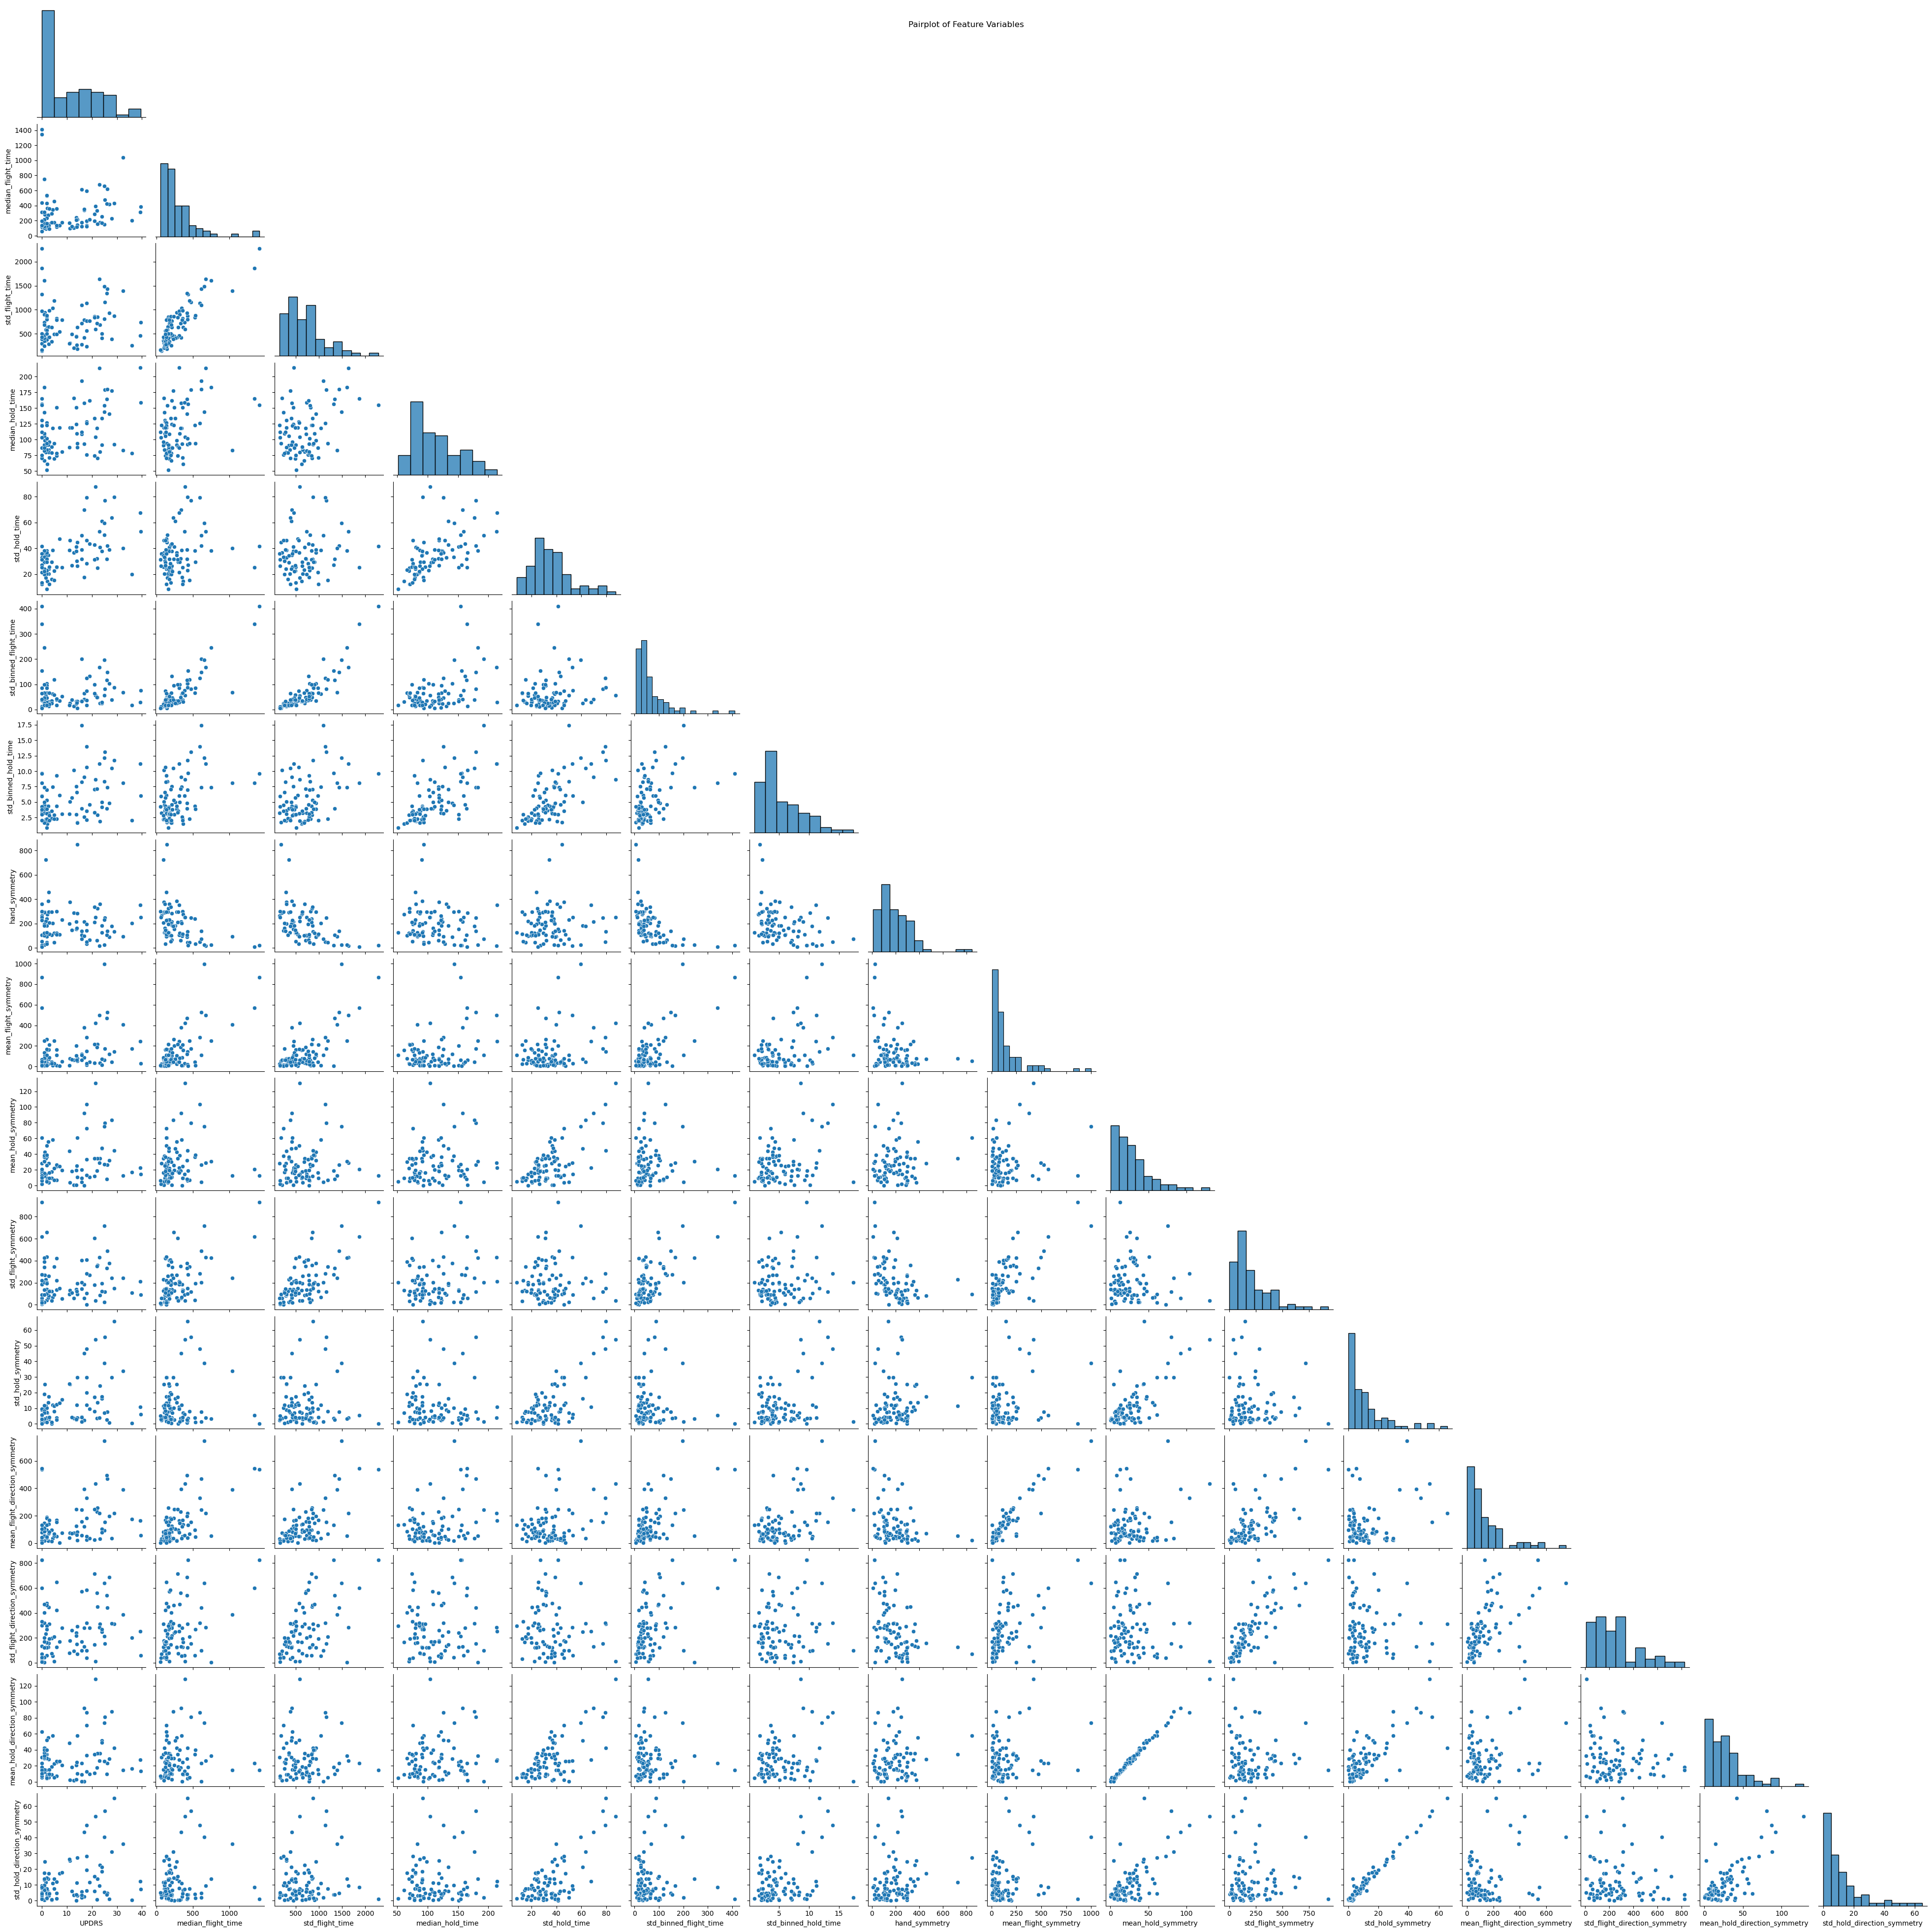

In [9]:
features_only_df = df_features.drop(columns=['ID', 'Parkinsons'])
sns.pairplot(features_only_df, corner=True)
plt.suptitle('Pairplot of Feature Variables')
plt.show()

this is a lot -> hard to visually analyse -> additionally: correlation heatmap

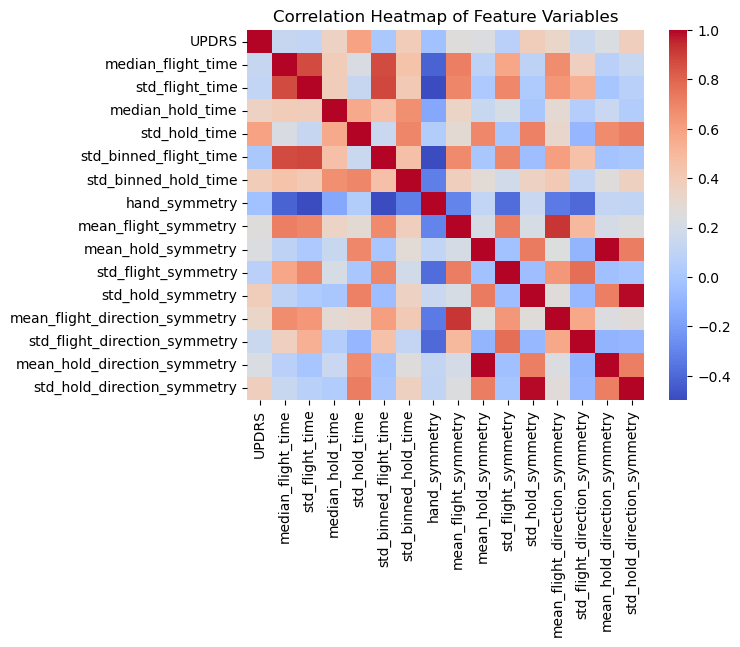

In [10]:
corr = features_only_df.corr()                                          # Computes the Pearson correlation coefficient between all pairs 
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap of Feature Variables')
plt.show()

**2.1 Linear Regression of Feautures against UPDRS score**

2.1.1- Perform a linear regression of the feature variables against UPDRS score.Don’t forget to split your data into training and testing appropriately!

In [11]:
# lets clean the data before splitting into independent and dependent variables
# do we have any nan values?

features_only_df.isna().any(axis=0) # features_only_df = feature matrix

UPDRS                             False
median_flight_time                False
std_flight_time                   False
median_hold_time                  False
std_hold_time                     False
std_binned_flight_time            False
std_binned_hold_time              False
hand_symmetry                     False
mean_flight_symmetry              False
mean_hold_symmetry                False
std_flight_symmetry               False
std_hold_symmetry                 False
mean_flight_direction_symmetry    False
std_flight_direction_symmetry     False
mean_hold_direction_symmetry      False
std_hold_direction_symmetry       False
dtype: bool

-> no NaN data

In [13]:
# dependent variable y =  UPDRS (predicted)
y = features_only_df['UPDRS']

# predictors = all other feature variables 
x = features_only_df.drop(columns=['UPDRS'])

# train test split your data with a test size of 30% of your data
# helpful tip for this dataset only - set the random state argument to random_state=6 (makes it reproducable - everytime same distribution)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 6 )

#scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# train a linear regression model on the train data
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# now predict for your test values
y_test_prediction = model.predict(x_test_scaled)


 2.1.2- Which features display the strongest relationship? What are their coefficients? Use an
 appropriate measure to define the goodness of fit.

In [14]:
# R² (Goodness of Fit)
r2 = r2_score(y_test, y_test_prediction)
print(r2)

-0.4504755533610898


chatgpt: Negative values → model performs worse than predicting the mean

-> zusammenhang wahrscheinlich nicht linear

In [15]:
# what are our coefficients for  the intercept? 
print(model.intercept_)


12.004237288135595


In [16]:
# what are our coefficients for each feature? (beta for x)    
coefficients = pd.Series(model.coef_, index=x.columns)
print(coefficients.sort_values(ascending=False))

mean_hold_symmetry                21.627173
std_hold_direction_symmetry       12.643251
std_hold_time                     11.643509
std_flight_time                    2.787048
std_flight_direction_symmetry      2.483665
mean_flight_direction_symmetry     2.481371
std_flight_symmetry                1.910057
median_flight_time                 1.077303
median_hold_time                   0.056494
hand_symmetry                     -0.366528
mean_flight_symmetry              -0.498552
std_binned_hold_time              -1.420622
std_binned_flight_time            -9.628720
std_hold_symmetry                -12.615029
mean_hold_direction_symmetry     -27.243377
dtype: float64


In [17]:
# strongest features (absolute value)
strongest_features = coefficients.abs().sort_values(ascending=False)
print(strongest_features.head())

mean_hold_direction_symmetry    27.243377
mean_hold_symmetry              21.627173
std_hold_direction_symmetry     12.643251
std_hold_symmetry               12.615029
std_hold_time                   11.643509
dtype: float64


**2.2 Non-linear regression of features against UPDRS score (15 marks)**

2.2.1- Perform a non-linear regression of the feature variables against UPDRS score, using a support vector machine. Don’t forget to split your data into training and testing appropriately!

In [18]:
# (difference to class: support vector regressor instead of classifier)

# we can reuse the train test split and the scaling from before (linear regression)

# Create SVR model - RBF kernel (Radial Basis Function) -> non-linear
svm = SVR(kernel='rbf')

# Train on scaled training data
svm.fit(x_train_scaled, y_train)

# Predict on scaled test data
y_test_pred_svm = svm.predict(x_test_scaled)

In [19]:
# Evaluate: R² (Goodness of Fit)
r2_svm = r2_score(y_test, y_test_pred_svm)
print(r2_svm)


0.21998890097090673


 2.2.2-  Compare and contrast your results with the linear regression.

-> way better than linear regression (see different R2 scores)